In [1]:
import pickle
import pandas as pd
with open('data/3_level_swap_00+_mitigation_new_all.pkl', 'rb') as f:
    noise_data_BB = pickle.load(f)
noise_data_BB

{'1': [[['error_0.00_divide_0',
    0.5981731807181899,
    Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = False
    Qobj data =
    [[ 2.85799444e-01+0.00000000e+00j  3.05893514e-02-3.81074212e-02j
      -2.38872916e-02-2.20318064e-02j  2.60948777e-01+1.21113010e-01j
       1.39049655e-02-1.46035179e-02j  8.16121139e-03-1.71995573e-02j
      -5.27185295e-03+4.80802031e-03j  8.80005769e-03-2.32926128e-03j
       3.12864129e-03-1.68998614e-02j  2.97184102e-03-5.17910067e-03j
      -3.51644820e-03-1.42983384e-02j  1.80449355e-02-2.98740324e-02j
      -5.86948544e-03-3.02773644e-03j  9.18437913e-03-3.11198557e-04j
       4.27484466e-03-4.38730838e-03j  8.02925788e-03+2.71342299e-03j]
     [ 3.05893514e-02+3.81074212e-02j  6.84324875e-02-4.08119649e-11j
       1.48288475e-03-1.49426842e-03j  2.34654415e-02+5.68179153e-02j
       1.21405534e-03+9.75149684e-03j  6.36005076e-03-4.63756733e-03j
      -6.96160132e-03-5.51872514e-03j -5.10150846e-03+

In [2]:
len(noise_data_BB['1'][0])

10

In [3]:
noise_data = {}
noise_data['BB'] = noise_data_BB

In [4]:
bin(1)[2:].zfill(4)

'0001'

In [5]:
import numpy as np
errordata = []
for arch in noise_data:
    for noisepos in noise_data[arch]:
        for noise_rows in noise_data[arch][noisepos]:
            for noise_row in noise_rows:
                key_,fidelity,rho,proportion = noise_row
                res = {}
                res['arch'] = arch
               
                res['pos'] = noisepos
                # res['key'] = key_
                res['errorrate'] = float(key_.split('_')[1])
                res['sampleidx'] = key_.split('_')[-1]
                res['fidelity'] = fidelity
                # res['rho'] = rho
                res['proportion'] = proportion

                errordata.append(res)

import pandas as pd
errordf = pd.DataFrame(errordata)
errordf

arch pos  errorrate sampleidx  fidelity  proportion
0     BB   1       0.00         0  0.598173    0.208574
1     BB   1       0.05         0  0.582080    0.208429
2     BB   1       0.10         0  0.568653    0.207787
3     BB   1       0.20         0  0.540949    0.206904
4     BB   1       0.30         0  0.519671    0.205880
..   ...  ..        ...       ...       ...         ...
195   BB   4       0.40         4  0.594522    0.173074
196   BB   4       0.50         4  0.599714    0.164145
197   BB   4       0.60         4  0.600245    0.154664
198   BB   4       0.70         4  0.598074    0.145108
199   BB   4       0.80         4  0.603118    0.136361

[200 rows x 6 columns]

In [6]:
errordf['pos'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [7]:
import pickle
with open('data/Fig3b_raw_data.pkl', 'rb') as file:
    entropy_data = pickle.load(file)

entropy_data

{'bb': {'reg_Ad[0]': [0.9663964261227699,
   0.9679112186520559,
   0.9629433782102726,
   0.9658333356324513,
   0.9591743334666447],
  'reg_RT[0]': [0.8600776558562176,
   0.8690484945010508,
   0.8515759373282428,
   0.8621424765725884,
   0.8800142169370577],
  'reg_RT[1]': [0.7787238562325861,
   0.7725121037644419,
   0.7641724364247826,
   0.78332012169903,
   0.7847099426565508],
  'reg_RTh[0]': [0.6350047696284102,
   0.6200831715032337,
   0.6341192164998802,
   0.6148606984676984,
   0.6156753504998695],
  'reg_RTh[1]': [0.6288590530184384,
   0.6610430098711432,
   0.635530281868449,
   0.6544752586132744,
   0.67211710223242],
  'reg_RTh[2]': [0.7018036368983391,
   0.6902617526826998,
   0.7246567973811662,
   0.721400958538423,
   0.7106117388332769],
  'reg_RTh[3]': [0.6216080607286973,
   0.6049779372312019,
   0.6018749663362409,
   0.6010299139687203,
   0.6190034990063888]}}

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cfdata = pd.read_csv('data/processed_fidelity.csv')

In [9]:
import numpy as np
entropys = {key: {} for key in entropy_data}
for arch in entropy_data:
    entropys[arch] = {noisepos: {} for noisepos in entropy_data[arch]}
    mean = []
    errup = []
    errdown = []
    poses = [
       'reg_RTh[0]',
   'reg_RT[0]',
      'reg_RTh[1]',
   'reg_Ad[0]',
      'reg_RTh[2]',
   'reg_RT[1]',
   'reg_RTh[3]'
]
    allposes = []
    allfids = []
    for pos in poses:
        fids = entropy_data[arch][pos]
        mean.append(np.mean(fids))
        errup.append(np.std(fids))
        errdown.append(np.std(fids))
        allposes.append([pos]*len(fids))
        allfids.append(fids)
    allposes = np.concatenate(allposes)
    allfids = np.concatenate(allfids)
    entropys[arch]= {'pos':poses, 'mean':mean, 'errup':errup, 'errdown':errdown, 'fids':allfids, 'poses':allposes}

entropys

{'bb': {'pos': ['reg_RTh[0]',
   'reg_RT[0]',
   'reg_RTh[1]',
   'reg_Ad[0]',
   'reg_RTh[2]',
   'reg_RT[1]',
   'reg_RTh[3]'],
  'mean': [0.6239486413198184,
   0.8645717562390314,
   0.650404941120745,
   0.9644517384168388,
   0.709746976866781,
   0.7766876921554784,
   0.6096988754542498],
  'errup': [0.008850519485850668,
   0.009523659223085715,
   0.01604141336264706,
   0.0030914326180180828,
   0.012662041393006057,
   0.007570452474153824,
   0.00879836823710431],
  'errdown': [0.008850519485850668,
   0.009523659223085715,
   0.01604141336264706,
   0.0030914326180180828,
   0.012662041393006057,
   0.007570452474153824,
   0.00879836823710431],
  'fids': array([0.63500477, 0.62008317, 0.63411922, 0.6148607 , 0.61567535,
         0.86007766, 0.86904849, 0.85157594, 0.86214248, 0.88001422,
         0.62885905, 0.66104301, 0.63553028, 0.65447526, 0.6721171 ,
         0.96639643, 0.96791122, 0.96294338, 0.96583334, 0.95917433,
         0.70180364, 0.69026175, 0.7246568 , 0.7

In [10]:
errordf = errordf.groupby(['arch','pos','errorrate'])[['fidelity','proportion']].agg(['mean','std']).reset_index()


In [11]:
errordf

arch pos errorrate  fidelity           proportion          
                           mean       std       mean       std
0    BB   1      0.00  0.603796  0.005320   0.208533  0.001163
1    BB   1      0.05  0.591838  0.007782   0.208216  0.001211
2    BB   1      0.10  0.577061  0.007421   0.207672  0.001198
3    BB   1      0.20  0.553344  0.009516   0.206633  0.001197
4    BB   1      0.30  0.528729  0.007760   0.205805  0.001029
5    BB   1      0.40  0.504240  0.006957   0.204972  0.000929
6    BB   1      0.50  0.478468  0.009255   0.204333  0.000858
7    BB   1      0.60  0.452496  0.008777   0.203298  0.000984
8    BB   1      0.70  0.424551  0.010205   0.202348  0.000823
9    BB   1      0.80  0.398998  0.011794   0.201683  0.000773
10   BB   2      0.00  0.603796  0.005320   0.208533  0.001163
11   BB   2      0.05  0.603960  0.006014   0.204069  0.001223
12   BB   2      0.10  0.601960  0.006162   0.199550  0.001121
13   BB   2      0.20  0.599485  0.006486   0.190549  0.001045
14   BB   2      0.30  0.597262  0.005112   0.181823  0.000957
15   BB   2      0.40  0.595036  0.003148   0.172654  0.000740
16   BB   2      0.50  0.592325  0.006089   0.163790  0.000565
17   BB   2      0.60  0.589708  0.006571   0.154686  0.000523
18   BB   2      0.70  0.585348  0.008790   0.145815  0.000394
19   BB   2      0.80  0.580709  0.007102   0.136847  0.000326
20   BB   3      0.00  0.603796  0.005320   0.208533  0.001163
21   BB   3      0.05  0.603671  0.006012   0.204354  0.001166
22   BB   3      0.10  0.601516  0.005937   0.200143  0.001065
23   BB   3      0.20  0.598996  0.007387   0.191701  0.000992
24   BB   3      0.30  0.596399  0.004808   0.183305  0.000830
25   BB   3      0.40  0.595646  0.003592   0.174883  0.000783
26   BB   3      0.50  0.591307  0.003078   0.166640  0.000603
27   BB   3      0.60  0.587835  0.002721   0.158100  0.000647
28   BB   3      0.70  0.583602  0.006079   0.149741  0.000585
29   BB   3      0.80  0.578992  0.007362   0.141354  0.000527
30   BB   4      0.00  0.603796  0.005320   0.208533  0.001163
31   BB   4      0.05  0.604852  0.006424   0.204103  0.001190
32   BB   4      0.10  0.603326  0.006124   0.199641  0.001154
33   BB   4      0.20  0.602186  0.006419   0.190543  0.001085
34   BB   4      0.30  0.602263  0.005565   0.181610  0.000908
35   BB   4      0.40  0.602412  0.005499   0.172481  0.000761
36   BB   4      0.50  0.601217  0.003673   0.163575  0.000553
37   BB   4      0.60  0.600965  0.004772   0.154257  0.000552
38   BB   4      0.70  0.599490  0.006827   0.145201  0.000503
39   BB   4      0.80  0.600618  0.006002   0.136262  0.000472

In [12]:
import pickle
import pandas as pd
with open('data/3_level_entropy.pkl', 'rb') as f:
    noise_data_entropy = pickle.load(f)
noise_data_entropy

{'1': [0.9707580054433933],
 '2': [0.832160786400974, 0.8342211927156367],
 '3': [0.6142901359946596,
  0.6310623234128141,
  0.6330482086786813,
  0.6354596730316908]}

In [13]:
entropysim = np.array([
    noise_data_entropy['3'][0],
    noise_data_entropy['2'][0],
    noise_data_entropy['3'][1],
    noise_data_entropy['1'][0],
    noise_data_entropy['3'][2],
    noise_data_entropy['2'][1],
    noise_data_entropy['3'][3],
])

In [14]:
import pickle
import pandas as pd
with open('data/3_level_swap_Max_Superposition_classic_01010101_new.pkl', 'rb') as f:
    noise_data_3level = pickle.load(f)
noise_data_3level

{'with_EM': [[['Addr_Max_Superposition_Class_01010101',
    0.4844828681985668,
    Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = False
    Qobj data =
    [[ 0.07987123+0.00000000e+00j -0.00799539-2.85801236e-02j
      -0.00545957-2.68010912e-03j  0.05118407+1.98518694e-03j
       0.0627071 +1.02445763e-02j -0.00153024-1.16696078e-02j
      -0.00034497+6.85053598e-03j  0.03534974+3.34160542e-03j
       0.04779432-6.67888345e-03j  0.00222003-7.64979981e-03j
       0.01351643-4.72805928e-03j  0.0505043 -9.62395221e-03j
       0.04758867-6.89754961e-03j -0.00149466+3.61953443e-03j
      -0.00307101-7.59357959e-03j  0.02915961-2.02470254e-02j]
     [-0.00799539+2.85801254e-02j  0.03040512+4.05979916e-10j
       0.00213848+1.59036764e-03j -0.00630768+1.56015987e-02j
      -0.0158727 +2.06973758e-02j  0.01260822+4.78049600e-03j
      -0.00988689-4.91258921e-03j -0.0073551 +1.11333421e-02j
      -0.00479047+2.36412678e-02j  0.00269815+1.85834919

In [15]:
noise_data_3level.keys()

dict_keys(['with_EM', 'without_EM'])

In [16]:
len(noise_data_3level['without_EM'][2][0])

4

In [17]:
expdata_3level = []
for method in noise_data_3level:
    for noise_rows in noise_data_3level[method]:
        for noise_row in noise_rows:
            key_,fidelity,rho,proportion = noise_row
            res = {}
            res['mitigation'] = method
            res['address'] = key_
            res['classical'] = key_.split('_')[-1]
            res['fidelity'] = fidelity
            # res['rho'] = rho
            res['proportion'] = proportion

            expdata_3level.append(res)
            
expdf_3level = pd.DataFrame(expdata_3level)
expdf_3level

mitigation                                address classical  fidelity  \
0     with_EM  Addr_Max_Superposition_Class_01010101  01010101  0.484483   
1     with_EM  Addr_Max_Superposition_Class_01010101  01010101  0.486745   
2     with_EM  Addr_Max_Superposition_Class_01010101  01010101  0.482929   
3     with_EM  Addr_Max_Superposition_Class_01010101  01010101  0.501825   
4     with_EM  Addr_Max_Superposition_Class_01010101  01010101  0.483870   
5  without_EM  Addr_Max_Superposition_Class_01010101  01010101  0.226280   
6  without_EM  Addr_Max_Superposition_Class_01010101  01010101  0.229350   
7  without_EM  Addr_Max_Superposition_Class_01010101  01010101  0.225902   
8  without_EM  Addr_Max_Superposition_Class_01010101  01010101  0.230450   
9  without_EM  Addr_Max_Superposition_Class_01010101  01010101  0.218681   

   proportion  
0    0.160667  
1    0.159176  
2    0.158731  
3    0.159670  
4    0.160701  
5    1.000000  
6    1.000000  
7    1.000000  
8    1.000000  
9    1.000000

In [18]:
expdf_3level_res=expdf_3level.groupby(['mitigation'])["fidelity","proportion"].agg(['mean','std'])

/tmp/ipykernel_544059/554960940.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  expdf_3level_res=expdf_3level.groupby(['mitigation'])["fidelity","proportion"].agg(['mean','std'])


In [19]:
"${:.3f}\\pm{:.3f}$".format(expdf_3level_res['fidelity']['mean']['without_EM'],expdf_3level_res['fidelity']['std']['without_EM'])

'$0.226\\pm0.005$'

In [20]:
"${:.3f}\\pm{:.3f}$".format(expdf_3level_res['fidelity']['mean']['with_EM'],expdf_3level_res['fidelity']['std']['with_EM'])

'$0.488\\pm0.008$'

In [21]:
expdf_3level_res

fidelity           proportion          
                mean       std       mean       std
mitigation                                         
with_EM     0.487970  0.007872   0.159789  0.000882
without_EM  0.226133  0.004599   1.000000  0.000000

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors


def plot_discrete_contourf_with_anchor(
    df, levels, ax,
    layer_col="layer",
    y_col="pp",
    z_col="fqram",
    cmap_name="BuPu",
    x_density=300
):
    """
    df: DataFrame, 包含三列 (layer, gate_error_rate, fidelity)
    levels: fidelity 等高线级别（list, 升序）
    """
    cmap = plt.colormaps.get_cmap(cmap_name)
    norm = colors.BoundaryNorm(boundaries=[0]+levels, ncolors=cmap.N)

    # 分层处理
    layers_sorted = sorted(df[layer_col].unique())
    fits = {}  # 每个 layer 内的数据，用于插值
    for layer in layers_sorted:
        sub = df[df[layer_col]==layer].sort_values(y_col)
        y = np.array(sub[y_col])
        z = np.array(sub[z_col])
        mask = (~np.isnan(y)) & (~np.isnan(z)) & (y>0) & (z>=0) & (z<1)
        y, z = y[mask], z[mask]
        if len(y)==0:
            continue

        logy = np.log(y)
        log1mz = np.log(1-z)
        # 添加锚点 (y=1,z=0)
        logy_aug = np.concatenate(([0.0], logy))
        log1mz_aug = np.concatenate(([0.0], log1mz))
        # 保证升序
        idx_sort = np.argsort(logy_aug)
        fits[layer] = (logy_aug[idx_sort], log1mz_aug[idx_sort])

    # 为每个 level 计算各 layer 对应 y
    contours = {}
    for level in levels:
        target_log1mz = np.log(1-level)
        xs, ys = [], []
        for layer in layers_sorted:
            if layer not in fits:
                continue
            logy_pts, log1mz_pts = fits[layer]
            # 分段线性插值求 log(y) 对应 target_log1mz
            if target_log1mz <= log1mz_pts[0]:
                logy_est = logy_pts[0]
            elif target_log1mz >= log1mz_pts[-1]:
                logy_est = logy_pts[-1]
            else:
                idx = np.searchsorted(log1mz_pts, target_log1mz) - 1
                t = (target_log1mz - log1mz_pts[idx]) / (log1mz_pts[idx+1]-log1mz_pts[idx])
                logy_est = logy_pts[idx]*(1-t) + logy_pts[idx+1]*t
            y_est = np.exp(logy_est)
            xs.append(layer)
            ys.append(y_est)
        if len(xs)>1:
            contours[level] = (np.array(xs), np.array(ys))

    # 绘制填充带和等高线
    for l1, l2 in zip(levels[:-1], levels[1:]):
        if l1 in contours and l2 in contours:
            xs1, ys1 = contours[l1]
            xs2, ys2 = contours[l2]
            ## use log y = A log x + B to get A
            poly1 = np.polyfit(np.log(xs1), np.log(ys1), 1)
            poly2 = np.polyfit(np.log(xs2), np.log(ys2), 1)
            print(f"Level {l1}-{l2}: slope1={poly1[0]:.3f}, slope2={poly2[0]:.3f}")
            # 为 fill_between 用更密集点插值
            xs_dense = np.linspace(xs1[0]-0.5, xs1[-1]+0.5, 300)

            # log-space 线性插值 + 外推
            def log_space_interp_with_extrap(xs_dense, xs, ys):
                logy = np.log(ys)
                logy_dense = np.zeros_like(xs_dense)
                for i, x in enumerate(xs_dense):
                    if x <= xs[0]:
                        # 左端外推，沿第一段斜率
                        slope = (logy[1]-logy[0])/(xs[1]-xs[0])
                        logy_dense[i] = logy[0] + slope*(x-xs[0])
                    elif x >= xs[-1]:
                        # 右端外推，沿最后一段斜率
                        slope = (logy[-1]-logy[-2])/(xs[-1]-xs[-2])
                        logy_dense[i] = logy[-1] + slope*(x-xs[-1])
                    else:
                        # 内部插值
                        idx = np.searchsorted(xs, x) - 1
                        t = (x-xs[idx])/(xs[idx+1]-xs[idx])
                        logy_dense[i] = logy[idx]*(1-t) + logy[idx+1]*t
                return np.exp(logy_dense)

            y1_dense = log_space_interp_with_extrap(xs_dense, xs1, ys1)
            y2_dense = log_space_interp_with_extrap(xs_dense, xs2, ys2)

            
            color = cmap(norm((l1 + l2) / 2.0))
            ax.fill_between(xs_dense, y1_dense, y2_dense, color=color, linewidth=0)
            ax.plot(xs_dense, y1_dense, color="black", linewidth=1)
            ax.plot(xs_dense, y2_dense, color="black", linewidth=1)

    # 标注等高线
    # for level, (xs, ys) in contours.items():
    #     ax.text(xs[-1]+0.15, ys[-1], f"{level:.0e}", fontsize=8, va="center")
        # 添加实验点
    expdata = [
        {"layer": 2, "pp": 0.0038, "fqram": 0.595},
        {"layer": 3, "pp": 0.0038, "fqram": expdf_3level_res['fidelity']['mean']['without_EM']},
    ]
    ax.set_yscale("log")
    for item in expdata:
        ax.plot(item['layer'], item['pp'], marker='*', markeredgewidth=1,
                markeredgecolor="k", markersize=50,
                color="w", label='Experimental data')
        # fqram = cfdata[(cfdata['layer']==item['layer']) & (cfdata['pp']==item['pp'])]['fqram'].values
        # if len(fqram) > 0:
        #     fqram = fqram[0]
        # ax.plot(item['layer'], item['pp'], marker='*', markeredgewidth=5,
        #         markeredgecolor=cmap(fqram), markersize=25,
        #         color=cmap(fqram), label='Experimental data')
    # 设置轴
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("Number of QRAM layers")
    ax.set_ylabel("Gate error rate")
    ax.set_xticks(layers_sorted)
    ax.set_xlim(layers_sorted[0]-0.3, layers_sorted[-1]+0.3)
    ax.set_ylim(1e-5, 1e-2)
    ax.set_yticks(np.logspace(-5, -2, 4))
    ax.set_yticks(np.concatenate([np.linspace(10**(x),10**(x+1), 9) for x in range(-5, -2)]), minor=True)
    ax.set_xticks(np.arange(2, 10, 2))  # 设置x轴刻度值                                                                                                                                                                                                                                                                                         
    ax.set_xticks(np.arange(2, 10, 1), minor=True)  # 设置x轴次刻度值
    ax.set_xticklabels(np.arange(2, 10, 2))  # 设置x轴刻度标签
    ax.set_xticklabels([], minor=True)  # 设置x轴次刻度标签
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return ax


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.markers import MarkerStyle
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
## import cmap
from matplotlib import colors
import matplotlib.cm as cm
# Nature期刊格式设置
fontsize = 55
# Nature期刊格式设置
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 10,
    'lines.linewidth': 1.0,
    'axes.linewidth': 3,
    'xtick.major.width': 3,
    'xtick.major.size': 15,
    'ytick.major.width': 3,
    'ytick.major.size': 15,
    'xtick.minor.width': 2,
    'xtick.minor.size': 10,
    'ytick.minor.width': 2,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize': (16*1.8, 16*1.8/1.743)  # 双栏尺寸：18cm → 7.2 inches
})


color_map = {'1': '#EE8C67', '2':'#7895C1', '3': '#5CA7C7', '4': '#C75854'} 
error_barc={'BB': '#F00', "Fanout": '#000'}
marker_map = {"Fanout": {'1': 'd', '2':'*', '3': '^', '4': 'D'},
 "BB": {'1': 'd', '2':'*', '3': '^', '4': 'D'}}
fillstyle_map = {"Fanout": 'none',
                 "BB": 'none'}
line_style_map = {"Fanout": '--',
                 "BB": '-'}
# 创建图表
colportion = 0.75
ax = plt.axes([0, 0, 0.55, 1])
for arch in ['BB']:
        for pos in errordf['pos'].unique():
                data_noise = errordf[(errordf.arch==arch) & (errordf.pos==pos)]
                x = data_noise['errorrate'].values
                y = data_noise['fidelity']['mean'].values
                ## fit curve
                popt, pcov = curve_fit(lambda x,a : a * x + data_noise['fidelity']['mean'].values[0], x, y, p0=[0.01])
                print(pos,popt[0])
                ax.plot(x, popt[0] * x + data_noise['fidelity']['mean'].values[0], color=color_map[pos], label=arch + '|' + pos + '_fit',
                        linestyle=line_style_map[arch],linewidth = 6)
                ## plot data
                ax.errorbar(x, y, yerr=data_noise['fidelity']['std'].values, fmt='o', color=color_map[pos],
                            capsize=15, capthick=6, elinewidth=6,
                              markersize = 30, 
                        #     dash_capstyle=True,
                            label=arch + '|' + pos, markeredgewidth=6,
                            markerfacecolor='white',markeredgecolor=color_map[pos],
                       fillstyle=fillstyle_map[arch]
                        )
                continue
# 坐标轴和标签设置
ax.set_xlabel(r'$e_d$ - Depolarizing error rate', labelpad=2)
ax.set_ylabel('Query fidelity', labelpad=10)
# ax.set_yticks([0.2,0.25,0.3,0.35])
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
## hidden the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 图例和网格
# ax.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.02, 0.02))
# ax.grid(True, which='major', linestyle='--', linewidth=2)
# ax.grid(True, which='minor', linestyle=':',linewidth=1)
ax.set_ylim(0.35,0.65)

ax = plt.axes([0.7, 0.6, 0.3, 0.4])
# 绘制Bucket-Bridge曲线
color_map = {'fanout': '#EE8C67', 'bb':'#7895C1'} #{'BB': '#1f77b4', "Fanout": '#d62728'}
marker_map = {"fanout": 'o',"bb":'*'}
fillstyle_map = {"fanout": 'full',
                 "bb": 'none'}
ax.scatter(entropys['bb']['pos'], entropysim, 
                color='#992224',   # 颜色
                label=arch+'sim',
                marker='*',
                s=2000,
                )
for arch in ['bb']:
        ax.plot(entropys[arch]['poses'],entropys[arch]['fids'], 
                color=color_map[arch],   # 颜色
                label=arch+'sim',
                marker=marker_map[arch], markersize = 45,
                fillstyle=fillstyle_map[arch],
                markeredgewidth=2,
                linestyle='none',
                )
# 坐标轴和标签设置

ax.set_xlabel('Routers')
ax.set_ylabel('Entanglement entropy')
ax.set_xticklabels([])
# ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(0.5,1.0)
ax.set_xlim(-0.5,6.5)
# 创建绘图
ax = plt.axes([0.7, 0.0, 0.3, 0.4])
# 示例调用：
levels = [0,1e-1,3e-1,5e-1,7e-1,9e-1,0.95,0.99,0.995,0.999,0.9999]
plot_discrete_contourf_with_anchor(cfdata, levels,ax)
import os
if os.path.exists('figs') is False:
    os.makedirs('figs')
plt.savefig('figs/Fig3.svg', bbox_inches='tight')  # 保存图片
# 显示图形

1 -0.2538350439593328
2 -0.025494512208596668
3 -0.027649194477335378
4 -0.004834303092336281
Level 0-0.1: slope1=0.000, slope2=-4.549
Level 0.1-0.3: slope1=-4.549, slope2=-3.395
Level 0.3-0.5: slope1=-3.395, slope2=-2.721
Level 0.5-0.7: slope1=-2.721, slope2=-2.721
Level 0.7-0.9: slope1=-2.721, slope2=-2.723
Level 0.9-0.95: slope1=-2.723, slope2=-2.733
Level 0.95-0.99: slope1=-2.733, slope2=-2.743
Level 0.99-0.995: slope1=-2.743, slope2=-2.739
Level 0.995-0.999: slope1=-2.739, slope2=-2.740
Level 0.999-0.9999: slope1=-2.740, slope2=-2.748


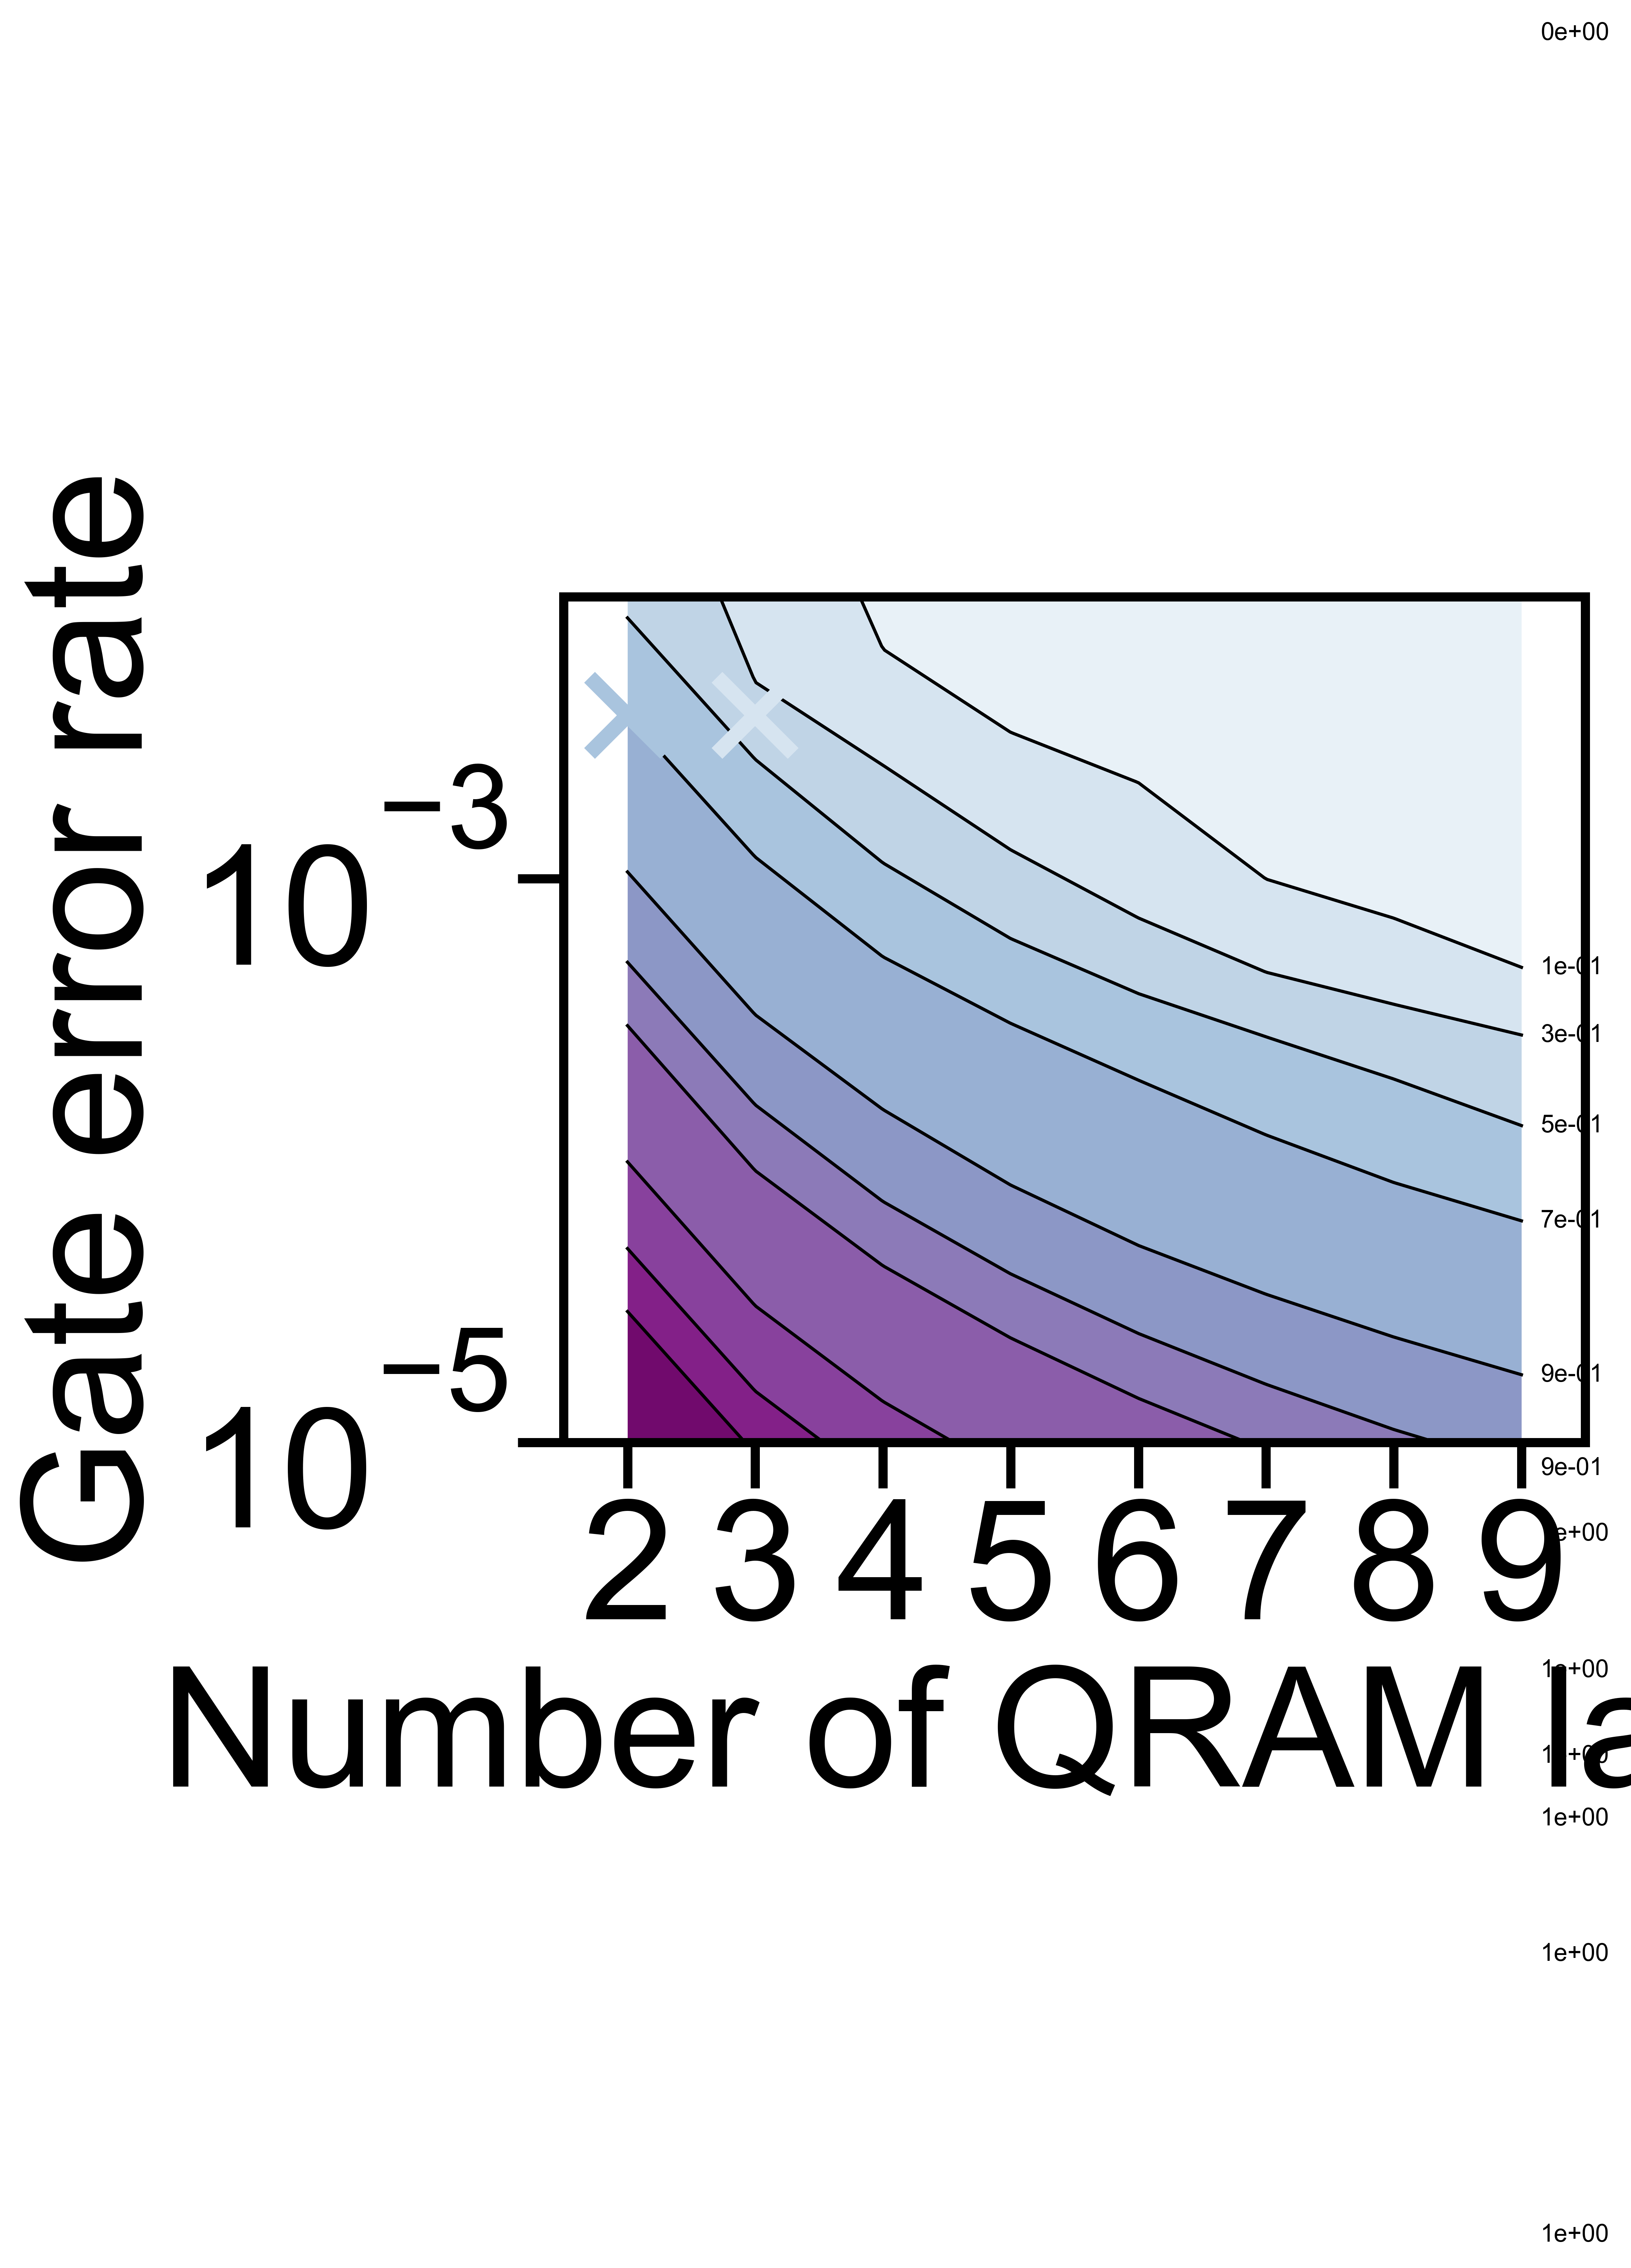

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

def plot_discrete_log_interp_contour(df, levels, ax,
                                     layer_col="layer",
                                     y_col="pp",
                                     z_col="fqram",
                                     cmap_name="BuPu"):
    """
    df: DataFrame 包含三列 (layer, gate_error_rate, fidelity)
    levels: fidelity 等高线级别（list, 升序）
    ax: matplotlib Axes 对象
    """
    cmap = plt.colormaps.get_cmap(cmap_name)
    norm = colors.BoundaryNorm(boundaries=[0]+levels, ncolors=cmap.N)

    # 分层处理
    layers_sorted = sorted(df[layer_col].unique())
    fits = {}  # 每个 layer 内的数据，用于插值
    for layer in layers_sorted:
        sub = df[df[layer_col]==layer].sort_values(y_col)
        y = np.array(sub[y_col])
        z = np.array(sub[z_col])
        mask = (~np.isnan(y)) & (~np.isnan(z)) & (y>0) & (z>=0) & (z<1)
        y, z = y[mask], z[mask]
        if len(y)==0:
            continue

        logy = np.log(y)
        log1mz = np.log(1-z)
        # 添加锚点 (y=1,z=0)
        logy_aug = np.concatenate(([0.0], logy))
        log1mz_aug = np.concatenate(([0.0], log1mz))
        # 保证升序
        idx_sort = np.argsort(logy_aug)
        fits[layer] = (logy_aug[idx_sort], log1mz_aug[idx_sort])

    # 为每个 level 计算各 layer 对应 y
    contours = {}
    for level in levels:
        target_log1mz = np.log(1-level)
        xs, ys = [], []
        for layer in layers_sorted:
            if layer not in fits:
                continue
            logy_pts, log1mz_pts = fits[layer]
            # 分段线性插值求 log(y) 对应 target_log1mz
            if target_log1mz <= log1mz_pts[0]:
                logy_est = logy_pts[0]
            elif target_log1mz >= log1mz_pts[-1]:
                logy_est = logy_pts[-1]
            else:
                idx = np.searchsorted(log1mz_pts, target_log1mz) - 1
                t = (target_log1mz - log1mz_pts[idx]) / (log1mz_pts[idx+1]-log1mz_pts[idx])
                logy_est = logy_pts[idx]*(1-t) + logy_pts[idx+1]*t
            y_est = np.exp(logy_est)
            xs.append(layer)
            ys.append(y_est)
        if len(xs)>1:
            contours[level] = (np.array(xs), np.array(ys))

    # 绘制填充带和等高线
    for l1, l2 in zip(levels[:-1], levels[1:]):
        if l1 in contours and l2 in contours:
            xs1, ys1 = contours[l1]
            xs2, ys2 = contours[l2]
            # 为 fill_between 用更密集点插值
            xs_dense = np.linspace(xs1[0], xs1[-1], 300)
            
            logy1_dense = np.interp(xs_dense, xs1, np.log(ys1))
            logy2_dense = np.interp(xs_dense, xs2, np.log(ys2))
            y1_dense = np.exp(logy1_dense)
            y2_dense = np.exp(logy2_dense)
            color = cmap(norm((l1 + l2) / 2.0))
            ax.fill_between(xs_dense, y1_dense, y2_dense, color=color, linewidth=0)
            ax.plot(xs_dense, y1_dense, color="black", linewidth=1)
            ax.plot(xs_dense, y2_dense, color="black", linewidth=1)

    # 标注等高线
    for level, (xs, ys) in contours.items():
        ax.text(xs[-1]+0.15, ys[-1], f"{level:.0e}", fontsize=8, va="center")
        # 添加实验点
    expdata = [
        {"layer": 2, "pp": 0.0038, "fqram": 0.595},
        {"layer": 3, "pp": 0.0038, "fqram": 0.200},
    ]
    ax.set_yscale("log")
    for item in expdata:
        ax.plot(item['layer'], item['pp'], marker='x', markeredgewidth=5,
                markeredgecolor=cmap(norm(item['fqram'])), markersize=25,
                color=cmap(norm(item['fqram'])), label='Experimental data')
        # fqram = cfdata[(cfdata['layer']==item['layer']) & (cfdata['pp']==item['pp'])]['fqram'].values
        # if len(fqram) > 0:
        #     fqram = fqram[0]
        # ax.plot(item['layer'], item['pp'], marker='*', markeredgewidth=5,
        #         markeredgecolor=cmap(fqram), markersize=25,
        #         color=cmap(fqram), label='Experimental data')
    # 设置轴
    ax.set_yscale("log")
    ax.set_xlabel("Number of QRAM layers")
    ax.set_ylabel("Gate error rate")
    ax.set_xticks(layers_sorted)
    ax.set_xlim(layers_sorted[0]-0.5, layers_sorted[-1]+0.5)
    ax.set_ylim(1e-5, 1e-2)

    return ax

fig, ax = plt.subplots(figsize=(6,5))
levels = [0,1e-1,3e-1,5e-1,7e-1,9e-1,0.95,0.97,0.99,0.995,0.997,0.999,0.9999]
ax = plot_discrete_log_interp_contour(cfdata, levels, ax)
plt.show()
